In [211]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# generate two class dataset
data = pd.read_csv("stroke 21 variables for ML.csv")
data.head()

,stroke,NP,NC,MP,MC,BasoP,BasoC,EosP,EosC,MPV,...,RBC,RDW-DV,MCV,Glc,PLT,PDW,PCT,Hgb,Sex,Age
0,1,85.40,7.95,4.7,0.44,0.2,2,1.2,0.11,10.0,...,2.71,15.0,81.5,11.91,177,16.2,0.177,73,0,64
1,1,66.60,5.10,5.4,0.41,0.2,2,0.8,0.06,8.7,...,4.98,12.7,89.4,6.93,241,16.0,0.210,153,1,47
2,1,61.70,4.72,6.6,0.51,0.2,2,4.4,0.34,8.4,...,4.62,12.5,92.0,9.43,227,15.0,0.192,139,1,44
3,1,83.34,10.69,2.9,0.37,0.2,2,0.2,0.02,9.3,...,5.06,12.4,88.5,7.98,296,11.3,0.270,138,0,60
4,1,58.50,3.93,5.3,0.36,0.3,2,0.4,0.03,8.7,...,3.70,12.8,91.0,5.67,193,15.3,0.168,107,0,65


In [212]:
# Split target and features
X = data.drop(['stroke'],axis=1)
X
y = data['stroke']
y = y.astype(int)
y
print(X.shape)
print(y.shape)

(10476, 23)
(10476,)


In [213]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
X_features = X
sc = StandardScaler()
X = sc.fit_transform(X)

In [214]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

# first one
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=5)

# second one

#X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=5)

print(X_train.shape)
print(X_test.shape)
#print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
#print(y_valid.shape)

(8380, 23)
(2096, 23)
(8380,)
(2096,)


In [215]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB



# logistic regression
model1 = LogisticRegression(C=1.01)
# knn
model2 = KNeighborsClassifier(n_neighbors=51)
# RF
model3 = RandomForestClassifier(random_state=25,criterion='entropy',n_estimators=186)

# XGBoost
model4 = XGBClassifier(learning_rate=0.01, n_estimators=1000, silent=0, gamma=0.2, subsample=0.75, 
                       objective='binary:logistic', reg_alpha=1, reg_lambda=1,seed=27,
                      max_depth=7, min_child_weight=3)

## elastic net
##model5 = ElasticNet(alpha=0.001, l1_ratio=0.1)

# neural network
model6 = MLPClassifier(alpha=0.1, hidden_layer_sizes=13)

# GaussianNB
model7=GaussianNB() ##因为唯一参数 var_smoothing设置为非默认值时， evaluation metrics的值很不理想

## 所以此处直接就是 by default 来设置

In [216]:
# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
## model5.fit(X_train, y_train)
model6.fit(X_train, y_train)
model7.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)
pred_prob4 = model4.predict_proba(X_test)
## pred_prob5 = model5.predict(X_test)
pred_prob6 = model6.predict_proba(X_test)
pred_prob7 = model7.predict_proba(X_test)

C:\Users\93513\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[09:47:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\93513\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [217]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)
## pred5 = model5.predict(X_test)
pred6 = model6.predict(X_test)
pred7 = model7.predict(X_test)

In [218]:
print(pred1)
print(pred2)
print(pred3)

[1 1 1 ... 1 0 0]
[1 0 1 ... 1 0 0]
[1 1 1 ... 1 0 0]


In [219]:
from sklearn.metrics import roc_auc_score, roc_curve

In [220]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
## fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5, pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# pos_label : 整数或者字符串, 默认None，表示被认为是正类样本的类别, 可以不填，因为运行三五十个点后就可以看到ROC曲线了

In [221]:
# 1 - auc scores  training set

pred1train = model1.predict(X_train)
pred2train = model2.predict(X_train)
pred3train = model3.predict(X_train)
pred4train = model4.predict(X_train)
## pred5train = model5.predict(X_train)
pred6train = model6.predict(X_train)
pred7train = model7.predict(X_train)


# predict probabilities
pred_prob1train = model1.predict_proba(X_train)
pred_prob2train = model2.predict_proba(X_train)
pred_prob3train = model3.predict_proba(X_train)
pred_prob4train = model4.predict_proba(X_train)
## pred_prob5train = model5.predict(X_train)
pred_prob6train = model6.predict_proba(X_train)
pred_prob7train = model7.predict_proba(X_train)

auc_score1train = roc_auc_score(y_train, pred_prob1train[:,1])
auc_score2train = roc_auc_score(y_train, pred_prob2train[:,1])
auc_score3train = roc_auc_score(y_train, pred_prob3train[:,1])
auc_score4train = roc_auc_score(y_train, pred_prob4train[:,1])
## auc_score5train = roc_auc_score(y_train, pred_prob5)
auc_score6train = roc_auc_score(y_train, pred_prob6train[:,1])
auc_score7train = roc_auc_score(y_train, pred_prob7train[:,1])



print(auc_score1train, auc_score2train, auc_score3train, auc_score4train,auc_score6train,auc_score7train)

0.8865951299682886 0.9030682840538763 1.0 0.985784029310592 0.9250418587262561 0.8475239766464071


In [222]:
print(format(auc_score3train,".15f"))

1.000000000000000


In [223]:
# 1 - auc scores testing set
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
## auc_score5 = roc_auc_score(y_test, pred_prob5)
auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])
auc_score7 = roc_auc_score(y_test, pred_prob7[:,1])



print(auc_score1, auc_score2, auc_score3, auc_score4,auc_score6,auc_score7)

0.8763238913732958 0.8893549617868789 0.9011967950696742 0.9149176412310152 0.9151607701084429 0.8382136674852915


In [224]:
## Calculating 95% CI for AUC

#### https://www.google.com/imgres?imgurl=https%3A%2F%2Fi.stack.imgur.com%2FzFGNa.png&imgrefurl=https%3A%2F%2Fstackoverflow.com%2Fquestions%2F50437354%2Fhow-to-calculate-95-confidence-interval-for-auc-from-confusion-matrix&tbnid=vFftbLzgp01LlM&vet=12ahUKEwintYqzxozzAhUTUn0KHQfoDFkQMygAegUIARCqAQ..i&docid=jK-T-QoSUo5GyM&w=1622&h=836&q=calculating%20confidence%20interval%20auc%20python&ved=2ahUKEwintYqzxozzAhUTUn0KHQfoDFkQMygAegUIARCqAQ


### https://gist.github.com/doraneko94/e24643136cfb8baf03ef8a314ab9615c

In [225]:
from math import sqrt

In [226]:
## model 1-LR

N1 = sum(y_test == 1)
N2 = sum(y_test != 1)
print (N1, N2)

Q1_1 = auc_score1 / (2 - auc_score1)
Q2_1 = 2*auc_score1**2 / (1 + auc_score1)
print (Q1_1, Q2_1)

SE_AUC_1 = sqrt((auc_score1*(1-auc_score1)+(N1-1)*(Q1_1- auc_score1**2)+(N2-1)*(Q2_1-auc_score1**2))/(N1*N2))
lower1 = auc_score1 - 1.96*SE_AUC_1
upper1 = auc_score1 + 1.96*SE_AUC_1
print(SE_AUC_1)
print(auc_score1)
print(lower1,upper1)

1037 1059
0.7798723178730668 0.8185618337243175
0.007753587808225357
0.8763238913732958
0.8611268592691741 0.8915209234774175


In [227]:
## model 2 - k-NN

Q1_2 = auc_score2 / (2 - auc_score2)
Q2_2 = 2*auc_score2**2 / (1 + auc_score2)
print (Q1_2, Q2_2)

SE_AUC_2 = sqrt((auc_score2*(1-auc_score2)+(N1-1)*(Q1_2- auc_score2**2)+(N2-1)*(Q2_2-auc_score2**2))/(N1*N2))
lower2 = auc_score2 - 1.96*SE_AUC_2
upper2 = auc_score2 + 1.96*SE_AUC_2
print(SE_AUC_2)
print(auc_score2)
print(lower2,upper2)

0.8007553549401633 0.8372722585774869
0.007345935358849615
0.8893549617868789
0.8749569284835337 0.9037529950902241


In [228]:
## model 3 - RF

Q1_3 = auc_score3 / (2 - auc_score3)
Q2_3 = 2*auc_score3**2 / (1 + auc_score3)
print (Q1_3, Q2_3)

SE_AUC_3 = sqrt((auc_score3*(1-auc_score3)+(N1-1)*(Q1_3- auc_score3**2)+(N2-1)*(Q2_3-auc_score3**2))/(N1*N2))
lower3 = auc_score3 - 1.96*SE_AUC_3
upper3 = auc_score3 + 1.96*SE_AUC_3
print(SE_AUC_3)
print(auc_score3)
print(lower3,upper3)

0.8201621464389689 0.854362542110312
0.0069495840477935686
0.9011967950696742
0.8875756103359989 0.9148179798033496


In [229]:
## model 4 - XGBoost

Q1_4 = auc_score4 / (2 - auc_score4)
Q2_4 = 2*auc_score4**2 / (1 + auc_score4)
print (Q1_4, Q2_4)

SE_AUC_4 = sqrt((auc_score4*(1-auc_score4)+(N1-1)*(Q1_4- auc_score4**2)+(N2-1)*(Q2_4-auc_score4**2))/(N1*N2))
lower4 = auc_score4 - 1.96*SE_AUC_4
upper4 = auc_score4 + 1.96*SE_AUC_4
print(SE_AUC_4)
print(auc_score4)
print(lower4,upper4)

0.843178062786847 0.8742666234957309
0.006454493671484005
0.9149176412310152
0.9022668336349065 0.9275684488271239


In [230]:
## model 6 - NN

Q1_6 = auc_score6 / (2 - auc_score6)
Q2_6 = 2*auc_score6**2 / (1 + auc_score6)
print (Q1_6, Q2_6)

SE_AUC_6 = sqrt((auc_score6*(1-auc_score6)+(N1-1)*(Q1_6- auc_score6**2)+(N2-1)*(Q2_6-auc_score6**2))/(N1*N2))
lower6 = auc_score6 - 1.96*SE_AUC_6
upper6 = auc_score6 + 1.96*SE_AUC_6
print(SE_AUC_6)
print(auc_score6)
print(lower6,upper6)

0.8435911468650746 0.8746202911184893
0.006445332467219583
0.9151607701084429
0.9025279184726925 0.9277936217441932


In [231]:
## model 7 - GaussianNB

Q1_7 = auc_score7 / (2 - auc_score7)
Q2_7 = 2*auc_score7**2 / (1 + auc_score7)
print (Q1_7, Q2_7)

SE_AUC_7 = sqrt((auc_score7*(1-auc_score7)+(N1-1)*(Q1_7- auc_score7**2)+(N2-1)*(Q2_7-auc_score7**2))/(N1*N2))
lower7 = auc_score7 - 1.96*SE_AUC_7
upper7 = auc_score7 + 1.96*SE_AUC_7
print(SE_AUC_7)
print(auc_score7)
print(lower7,upper7)

0.7214869412957907 0.7644401353193232
0.008804218112491522
0.8382136674852915
0.8209573999848081 0.8554699349857748


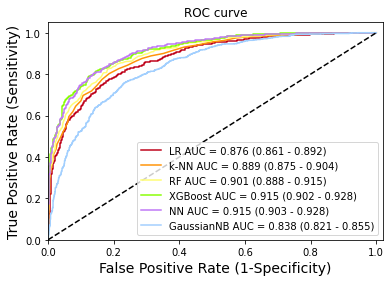

<Figure size 1800x1800 with 0 Axes>

In [232]:
# plot the ROC curves for the two algorithms using matplotlib:
# Ref: https://github.com/stanfordmlgroup/influenza-qtof/blob/master/notebooks/VTM_Subtraction.ipynb

#name_dict[names[l]] + ' (AUC = %0.2f (95%% CI %0.2f - %0.2f))' % (test_aucs[l], cis[names[l]][0], cis[names[l]][1]))
# plot roc curves
plt.plot(fpr1, tpr1,color='#be0119', label= 'LR' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score1, lower1, upper1))
plt.plot(fpr2, tpr2,color='#ff9408', label= 'k-NN' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score2, lower2, upper2))
plt.plot(fpr3, tpr3,color='#fffd74', label= 'RF' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score3, lower3, upper3))
plt.plot(fpr4, tpr4,color='#89fe05', label= 'XGBoost' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score4, lower4, upper4))
#plt.plot(fpr5, tpr5,color='#069af3', label='EN (AUC = %0.2f)' % auc_score5)
plt.plot(fpr6, tpr6,color='#bf77f6', label= 'NN' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score6, lower6, upper6))
plt.plot(fpr7, tpr7,color='#a2cffe', label= 'GaussianNB' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score7, lower7, upper7))
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')

# color source: https://xkcd.com/color/rgb/
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate (1-Specificity)')
# y label
plt.ylabel('True Positive Rate (Sensitivity)')

plt.legend(loc='best')
plt.savefig('ROC',dpi=500)
plt.xlim(0,1.02)    # remove the space from the curve to the axes
plt.ylim(0,1.05)

plt.rc('axes', labelsize=12)    # fontsize of the x and y labels

fig = plt.figure(figsize=(25,25))

plt.show()

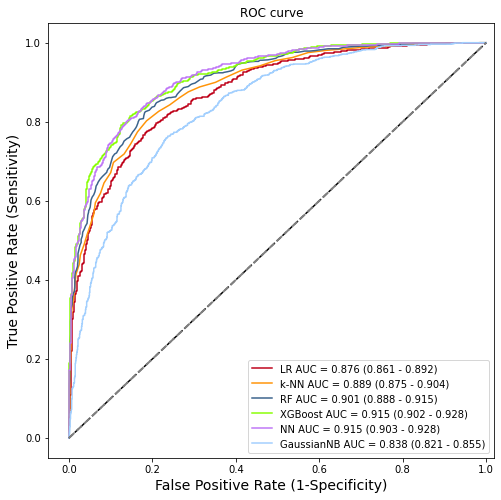

In [245]:
# plot the ROC curves for the two algorithms using matplotlib:
# Ref: https://github.com/stanfordmlgroup/influenza-qtof/blob/master/notebooks/VTM_Subtraction.ipynb

#name_dict[names[l]] + ' (AUC = %0.2f (95%% CI %0.2f - %0.2f))' % (test_aucs[l], cis[names[l]][0], cis[names[l]][1]))
# plot roc curves

plt.rc('axes', labelsize=14)    # fontsize of the x and y labels

fig = plt.figure(figsize=(8,8))
lw = 2

plt.plot(fpr1, tpr1,color='#be0119', label= 'LR' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score1, lower1, upper1))
plt.plot(fpr2, tpr2,color='#ff9408', label= 'k-NN' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score2, lower2, upper2))
plt.plot(fpr3, tpr3,color='#3b638c', label= 'RF' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score3, lower3, upper3))
plt.plot(fpr4, tpr4,color='#89fe05', label= 'XGBoost' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score4, lower4, upper4))
#plt.plot(fpr5, tpr5,color='#069af3', label='EN (AUC = %0.2f)' % auc_score5)
plt.plot(fpr6, tpr6,color='#bf77f6', label= 'NN' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score6, lower6, upper6))
plt.plot(fpr7, tpr7,color='#a2cffe', label= 'GaussianNB' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score7, lower7, upper7))
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')

plt.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate (1-Specificity)')
# y label
plt.ylabel('True Positive Rate (Sensitivity)')

plt.legend(loc='best')
plt.savefig('ROC',dpi=500)
plt.xlim(-0.05,1.02)    # remove the space from the curve to the axes
plt.ylim(-0.05,1.05)


plt.show()

In [234]:
############## AUC for training set

In [235]:
## training set - model 1-LR

N1t = sum(y_train == 1)
N2t = sum(y_train != 1)
print (N1t, N2t)

Q1_1t = auc_score1train / (2 - auc_score1train)
Q2_1t = 2*auc_score1train**2 / (1 + auc_score1train)
print (Q1_1t, Q2_1t)

SE_AUC_1t = sqrt((auc_score1train*(1-auc_score1train)+(N1t-1)*(Q1_1t- auc_score1train**2)+(N2t-1)*(Q2_1t-auc_score1train**2))/(N1t*N2t))
lower1t = auc_score1train - 1.96*SE_AUC_1t
upper1t = auc_score1train + 1.96*SE_AUC_1t
print(SE_AUC_1t)
print(auc_score1train)
print(lower1t,upper1t)

3962 4418
0.7962917657644493 0.8333011275150478
0.003774425410134936
0.8865951299682886
0.8791972561644241 0.8939930037721531


In [236]:
## training set - model 2 - k-NN


Q1_2t = auc_score2train / (2 - auc_score2train)
Q2_2t = 2*auc_score2train**2 / (1 + auc_score2train)
print (Q1_2t, Q2_2t)

SE_AUC_2t = sqrt((auc_score2train*(1-auc_score2train)+(N1t-1)*(Q1_2t- auc_score2train**2)+(N2t-1)*(Q2_2t-auc_score2train**2))/(N1t*N2t))
lower2t = auc_score2train - 1.96*SE_AUC_2t
upper2t = auc_score2train + 1.96*SE_AUC_2t
print(SE_AUC_2t)
print(auc_score2train)
print(lower2t,upper2t)

0.823267547948473 0.8570710073805473
0.0034981851608648254
0.9030682840538763
0.8962118411385812 0.9099247269691714


In [237]:
## training set - model 3 - RF


Q1_3t = auc_score3train / (2 - auc_score3train)
Q2_3t = 2*auc_score3train**2 / (1 + auc_score3train)
print (Q1_3t, Q2_3t)

SE_AUC_3t = sqrt((auc_score3train*(1-auc_score3train)+(N1t-1)*(Q1_3t- auc_score3train**2)+(N2t-1)*(Q2_3t-auc_score3train**2))/(N1t*N2t))
lower3t = auc_score3train - 1.96*SE_AUC_3t
upper3t = auc_score3train + 1.96*SE_AUC_3t
print(SE_AUC_3t)
print(auc_score3train)
print(lower3t,upper3t)

1.0 1.0
0.0
1.0
1.0 1.0


In [238]:
## training set - model 4 - XGBoost


Q1_4t = auc_score4train / (2 - auc_score4train)
Q2_4t = 2*auc_score4train**2 / (1 + auc_score4train)
print (Q1_4t, Q2_4t)

SE_AUC_4t = sqrt((auc_score4train*(1-auc_score4train)+(N1t-1)*(Q1_4t- auc_score4train**2)+(N2t-1)*(Q2_4t-auc_score4train**2))/(N1t*N2t))
lower4t = auc_score4train - 1.96*SE_AUC_4t
upper4t = auc_score4train + 1.96*SE_AUC_4t
print(SE_AUC_4t)
print(auc_score4train)
print(lower4t,upper4t)

0.9719665808856376 0.9787269291124243
0.0013419120193467584
0.985784029310592
0.9831538817526723 0.9884141768685116


In [239]:
## training set - model 6 - NN


Q1_6t = auc_score6train / (2 - auc_score6train)
Q2_6t = 2*auc_score6train**2 / (1 + auc_score6train)
print (Q1_6t, Q2_6t)

SE_AUC_6t = sqrt((auc_score6train*(1-auc_score6train)+(N1t-1)*(Q1_6t- auc_score6train**2)+(N2t-1)*(Q2_6t-auc_score6train**2))/(N1t*N2t))
lower6t = auc_score6train - 1.96*SE_AUC_6t
upper6t = auc_score6train + 1.96*SE_AUC_6t
print(SE_AUC_6t)
print(auc_score6train)
print(lower6t,upper6t)

0.8605375625418787 0.8890221649122165
0.0030831834628620974
0.9250418587262561
0.9189988191390464 0.9310848983134659


In [240]:
## training set - model 7 - GaussianNB


Q1_7t = auc_score7train / (2 - auc_score7train)
Q2_7t = 2*auc_score7train**2 / (1 + auc_score7train)
print (Q1_7t, Q2_7t)

SE_AUC_7t = sqrt((auc_score7train*(1-auc_score7train)+(N1t-1)*(Q1_7t- auc_score7train**2)+(N2t-1)*(Q2_7t-auc_score7train**2))/(N1t*N2t))
lower7t = auc_score7train - 1.96*SE_AUC_7t
upper7t = auc_score7train + 1.96*SE_AUC_7t
print(SE_AUC_7t)
print(auc_score7train)
print(lower7t,upper7t)

0.7353940207625274 0.7775778826907345
0.004339964268445613
0.8475239766464071
0.8390176466802537 0.8560303066125605


In [241]:
# roc curve for models on training set
fpr1t, tpr1t, thresh1t = roc_curve(y_train, pred_prob1train[:,1], pos_label=1)
fpr2t, tpr2t, thresh2t = roc_curve(y_train, pred_prob2train[:,1], pos_label=1)
fpr3t, tpr3t, thresh3t = roc_curve(y_train, pred_prob3train[:,1], pos_label=1)
fpr4t, tpr4t, thresh4t = roc_curve(y_train, pred_prob4train[:,1], pos_label=1)
## fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5, pos_label=1)
fpr6t, tpr6t, thresh6t = roc_curve(y_train, pred_prob6train[:,1], pos_label=1)
fpr7t, tpr7t, thresh7t = roc_curve(y_train, pred_prob7train[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probst = [0 for i in range(len(y_train))]
p_fprt, p_tprt, _ = roc_curve(y_train, random_probst, pos_label=1)

# pos_label : 整数或者字符串, 默认None，表示被认为是正类样本的类别, 可以不填，因为运行三五十个点后就可以看到ROC曲线了

In [242]:
auc_score3traint_t=0.99988
lower3tt=0.998400

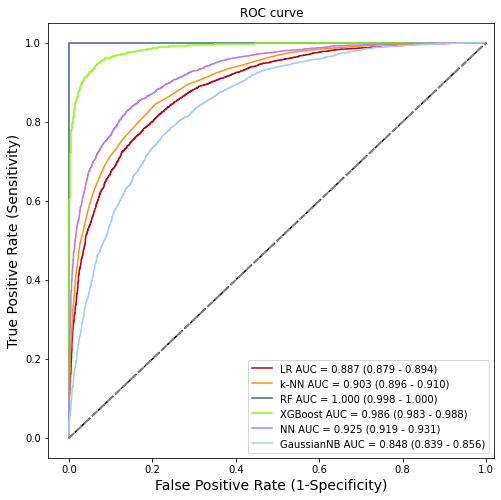

In [244]:
# plot the ROC curves for the two algorithms using matplotlib on the training set:
# Ref: https://github.com/stanfordmlgroup/influenza-qtof/blob/master/notebooks/VTM_Subtraction.ipynb

#name_dict[names[l]] + ' (AUC = %0.2f (95%% CI %0.2f - %0.2f))' % (test_aucs[l], cis[names[l]][0], cis[names[l]][1]))
# plot roc curves

plt.rc('axes', labelsize=14)    # fontsize of the x and y labels

fig = plt.figure(figsize=(8,8))
lw = 2

plt.plot(fpr1t, tpr1t,color='#be0119', label= 'LR' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score1train, lower1t, upper1t))
plt.plot(fpr2t, tpr2t,color='#ff9408', label= 'k-NN' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score2train, lower2t, upper2t))
plt.plot(fpr3t, tpr3t,color='#3b638c', label= 'RF' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score3traint_t, lower3tt, upper3t))
plt.plot(fpr4t, tpr4t,color='#89fe05', label= 'XGBoost' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score4train, lower4t, upper4t))
#plt.plot(fpr5, tpr5,color='#069af3', label='EN (AUC = %0.2f)' % auc_score5)
plt.plot(fpr6t, tpr6t,color='#bf77f6', label= 'NN' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score6train, lower6t, upper6t))
plt.plot(fpr7t, tpr7t,color='#a2cffe', label= 'GaussianNB' + ' AUC = %0.3f (%0.3f - %0.3f)' % (auc_score7train, lower7t, upper7t))
plt.plot(p_fprt, p_tprt, linestyle='--', color='black')

plt.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate (1-Specificity)')
# y label
plt.ylabel('True Positive Rate (Sensitivity)')

plt.legend(loc='best')
plt.savefig('ROC',dpi=500)
plt.xlim(-0.05,1.02)    # remove the space from the curve to the axes
plt.ylim(-0.05,1.05)


plt.show()